In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [5]:
file_paths = {
    "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
}

In [6]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    df["id"] = df["id"].str.extract(r"\['(.+)'\]")
    index_seq_pred = df[df["id"] == "WIV04"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

,Cat,Cattle,Chicken,Dromedary camel,Gray wolf,Human,Pig,Yak,id,y_true,model,Human_pred_diff
0,0.006134,0.573490,6.467954e-04,0.074003,0.055859,0.021283,0.014702,2.538816e-01,QQM19141.1,Human,msl128vs30_s64_UA,-0.006921
1,0.023987,0.535671,1.181538e-03,0.102456,0.036526,0.097806,0.015414,1.869586e-01,UZG29433.1,Human,msl128vs30_s64_UA,0.069602
2,0.008477,0.599940,7.195822e-04,0.080849,0.040363,0.033643,0.010577,2.254315e-01,QTJ90974.1,Human,msl128vs30_s64_UA,0.005440
3,0.087980,0.195794,1.084544e-03,0.109114,0.011576,0.529405,0.013246,5.180073e-02,UPP14409.1,Human,msl128vs30_s64_UA,0.501201
4,0.088668,0.196143,1.133529e-03,0.109758,0.011875,0.526386,0.013587,5.244939e-02,UWM38596.1,Human,msl128vs30_s64_UA,0.498182
...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.049596,0.000008,5.709027e-07,0.012002,0.000761,0.934219,0.003413,9.274993e-07,QRF70806.1,Human,msl256vs30cls_s64_UA,0.163530
14,0.044830,0.000010,7.142315e-07,0.015068,0.000796,0.935710,0.003584,1.224536e-06,QRN78347.1,Human,msl256vs30cls_s64_UA,0.165022
15,0.053220,0.000008,6.498222e-07,0.011768,0.000830,0.930592,0.003580,1.036695e-06,QWE88920.1,Human,msl256vs30cls_s64_UA,0.159904
16,0.215357,0.000038,5.505472e-06,0.003451,0.006076,0.772485,0.002578,8.980142e-06,QRX49325.1,Human,msl256vs30cls_s64_UA,0.001797


In [7]:
df

,Cat,Cattle,Chicken,Dromedary camel,Gray wolf,Human,Pig,Yak,id,y_true,model,Human_pred_diff
0,0.006134,0.573490,6.467954e-04,0.074003,0.055859,0.021283,0.014702,2.538816e-01,QQM19141.1,Human,msl128vs30_s64_UA,-0.006921
1,0.023987,0.535671,1.181538e-03,0.102456,0.036526,0.097806,0.015414,1.869586e-01,UZG29433.1,Human,msl128vs30_s64_UA,0.069602
2,0.008477,0.599940,7.195822e-04,0.080849,0.040363,0.033643,0.010577,2.254315e-01,QTJ90974.1,Human,msl128vs30_s64_UA,0.005440
3,0.087980,0.195794,1.084544e-03,0.109114,0.011576,0.529405,0.013246,5.180073e-02,UPP14409.1,Human,msl128vs30_s64_UA,0.501201
4,0.088668,0.196143,1.133529e-03,0.109758,0.011875,0.526386,0.013587,5.244939e-02,UWM38596.1,Human,msl128vs30_s64_UA,0.498182
...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.049596,0.000008,5.709027e-07,0.012002,0.000761,0.934219,0.003413,9.274993e-07,QRF70806.1,Human,msl256vs30cls_s64_UA,0.163530
14,0.044830,0.000010,7.142315e-07,0.015068,0.000796,0.935710,0.003584,1.224536e-06,QRN78347.1,Human,msl256vs30cls_s64_UA,0.165022
15,0.053220,0.000008,6.498222e-07,0.011768,0.000830,0.930592,0.003580,1.036695e-06,QWE88920.1,Human,msl256vs30cls_s64_UA,0.159904
16,0.215357,0.000038,5.505472e-06,0.003451,0.006076,0.772485,0.002578,8.980142e-06,QRX49325.1,Human,msl256vs30cls_s64_UA,0.001797


In [8]:
mapping_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "input/data/coronaviridae/20240313/wiv04/SARS_CoV_2_Variants_ViralZone.csv"))

In [9]:
mapping_df = mapping_df[~mapping_df["seq"].isna()]
mapping_df

,pango_lineage,who_name,tag,emergence_location,emergence_date,spike_mutations,seq,virus_host_name
0,BA.1,Omicron,Variant of Concern,South Africa,Dec-21,"A67V, H69-, V70-, T95I, G142D, V143-, Y144-, Y...",UFO69279.1,Homo sapiens
1,BA.2,Omicron,Variant of Concern,South Africa,Dec-21,"T19I, L24-, P25-, P26-, A27S, G142D, V213G, G3...",OM371884.1,Homo sapiens
2,BA.2.12.1,Omicron,Variant of Concern,North-America,Dec-21,"T19I, L24-, P25-, P26-, A27S, G142D, V213G, G3...",OM958567.1,Homo sapiens
3,BA.2.75,Omicron,Variant of Concern,India,Jun-22,"T19I, L24-, P25-, P26-, A27S, G142D, K147E, W1...",ON990685.1,Homo sapiens
4,JN.1,Omicron,Variant of Concern,Luxembourg,Jan-23,"A27S, A264D, A570V, D405N, D614G, D796Y, E484K...",WRK13149.1,Homo sapiens
5,BA.4,Omicron,Variant of Concern,South Africa,Jan-22,"T19I, L24-, P25-, P26-, A27S, H69-, V70-, V213...",UPP14409.1,Homo sapiens
6,BA.5,Omicron,Variant of Concern,South Africa,Jan-22,"T19I, L24-, P25-, P26-, A27S, H69-, V70-, V213...",UOZ45804.1,Homo sapiens
7,BQ.1.1,Omicron,Variant of Concern,Nigeria,Jul-22,"T19I, L24-, P25-, P26-, A27S, H69-, V70-, V213...",UWM38596.1,Homo sapiens
8,EG.5.1,Omicron,Variant of Concern,Indonesia/France/China,Jan-23,"A27S, D405N, D614G, D796Y, E484A, F456L, F486P...",WGM84363.1,Homo sapiens
9,XBB.1.5,Omicron,Variant of Concern,USA,Nov-22,"A27S, A475V, D405N, D614G, D796Y, E484A, F456L...",UZG29433.1,Homo sapiens


In [10]:
mapping_df["emergence_date"] = mapping_df["emergence_date"].apply(lambda x: datetime.strftime(datetime.strptime(x, '%b-%y'), '%m/%Y'))
mapping_df["emergence_date"] = pd.to_datetime(mapping_df["emergence_date"])

In [11]:
df = df.merge(mapping_df[["seq", "pango_lineage", "emergence_date"]], how="left", left_on="id", right_on="seq")

In [12]:
order = list(df.sort_values(by="emergence_date")["pango_lineage"].unique())

In [13]:
df[df["id"] == "WIV04"]

,Cat,Cattle,Chicken,Dromedary camel,Gray wolf,Human,Pig,Yak,id,y_true,model,Human_pred_diff,seq,pango_lineage,emergence_date
12,0.007064,0.605889,0.000613,0.076271,0.040858,0.028204,0.010321,2.307809e-01,WIV04,Human,msl128vs30_s64_UA,0.0,WIV04,WIV04,2019-12-01
18,0.417219,0.000354,0.000942,0.012350,0.004716,0.462348,0.101991,7.917170e-05,WIV04,Human,msl128vs30cls_s64_UA,0.0,WIV04,WIV04,2019-12-01
51,0.232556,0.000010,0.003878,0.004051,0.000138,0.739641,0.019725,6.522137e-07,WIV04,Human,msl256vs30_s64_UA,0.0,WIV04,WIV04,2019-12-01
59,0.217691,0.000035,0.000005,0.003171,0.006038,0.770689,0.002363,8.323927e-06,WIV04,Human,msl256vs30cls_s64_UA,0.0,WIV04,WIV04,2019-12-01


<Figure size 432x288 with 0 Axes>

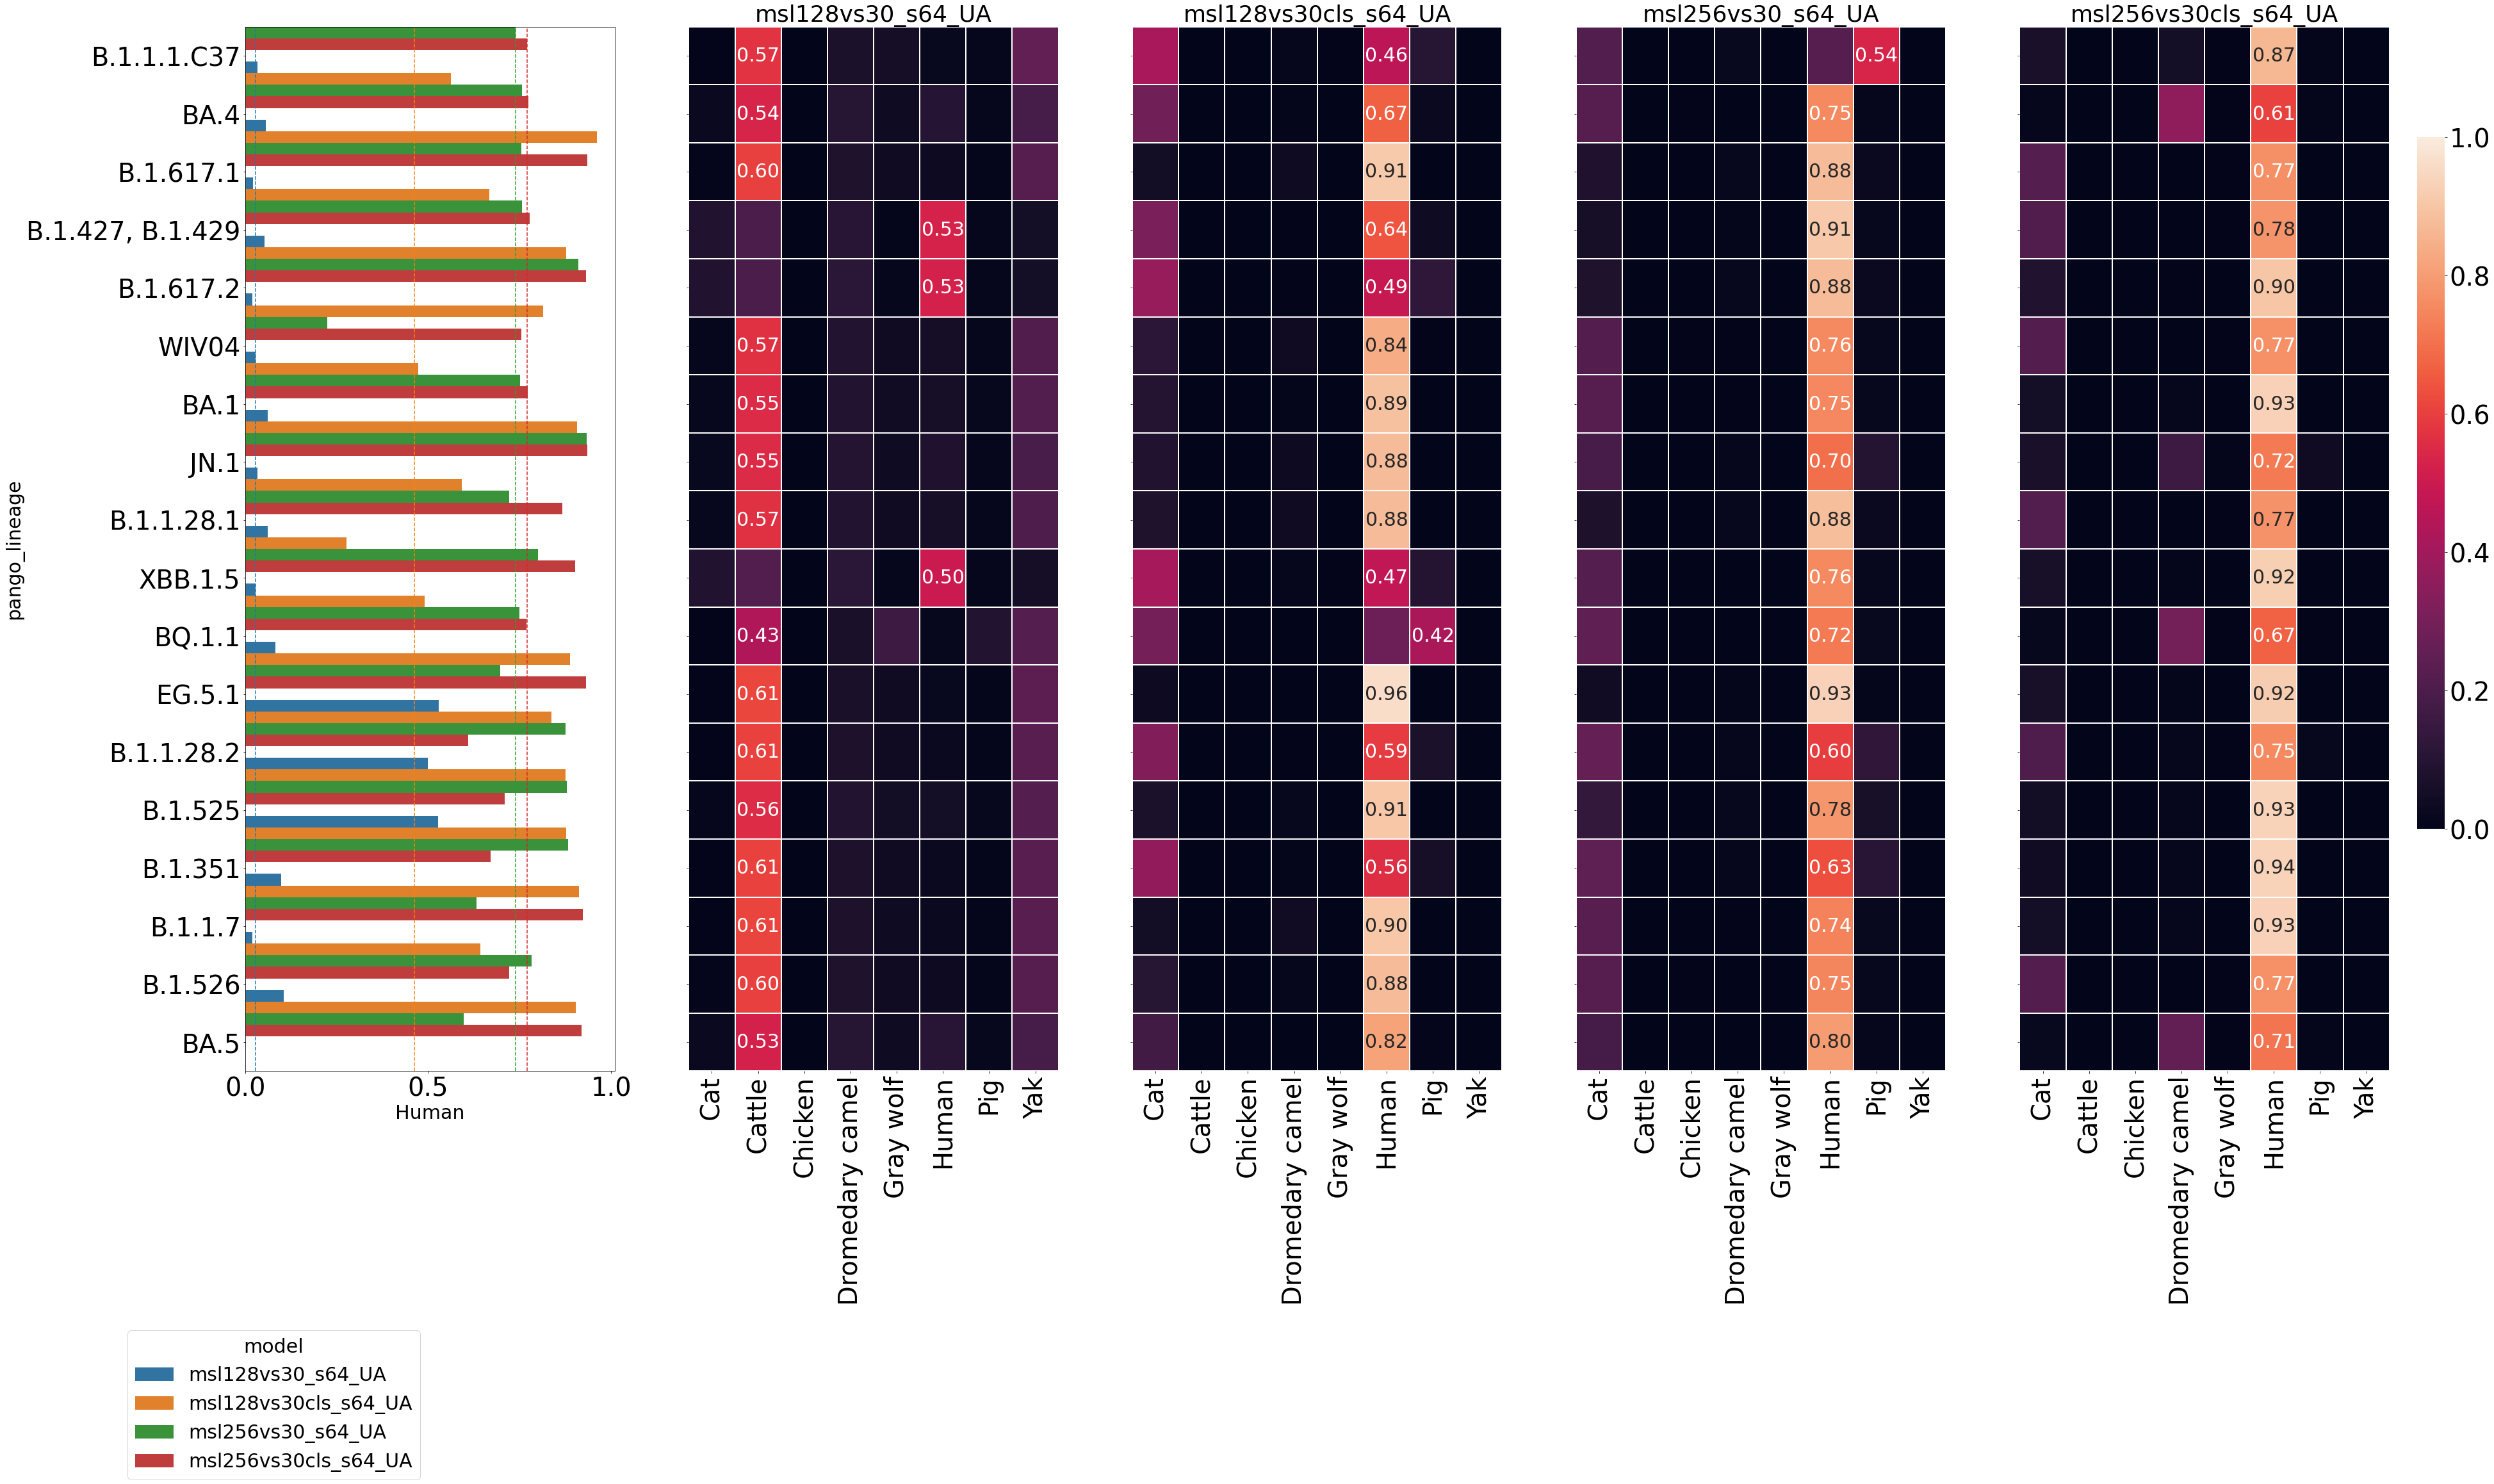

In [77]:
plt.clf()
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(1, 5, figsize=(60, 30), sharex=False, sharey=True, gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})

colors = sns.color_palette('tab10')
models = list(df["model"].unique())

color_palette_dict = {k: v for k, v in zip(models, colors)}

sns.barplot(df, y="pango_lineage", x="Human", hue="model", order=order, ax=axs[0])
               # boxprops={"facecolor": (.3, .5, .7, .5)})
sns.move_legend(axs[0], "lower right", bbox_to_anchor=(.5, -.4))

for model, color in zip(models, colors):
    axs[0].axvline(df[(df["model"] == model) & (df["id"] == "WIV04")]["Human"].values[0], color=color, linestyle="--")

    
    
def get_annotation_df(heatmap_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = "{:,.2f}".format(heatmap_df.loc[item[0], item[1]])
    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    
    return annot_df
    
cbar_ax = fig.add_axes([.91, .3, .01, .5])
for i, model in enumerate(models):
    heatmap_df = df[df["model"] == model][["Cat", "Cattle", "Chicken", "Dromedary camel", "Gray wolf", "Human", "Pig", "Yak", "pango_lineage"]].set_index("pango_lineage")
    get_annotation_df(heatmap_df)
    sns.heatmap(heatmap_df, ax=axs[i + 1], linewidth=.1, 
                annot=get_annotation_df(heatmap_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax)
    axs[i+1].set_title(model)
    axs[i+1].set(xlabel="", ylabel="")

plt.show()